# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 25.09.2022

Мягкий дедлайн: 23:59MSK 10.10.2022

Жесткий дедлайн: 23:59MSK 18.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [733]:
!pip install folium


In [734]:
!pip install ipyleaflet

In [735]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [736]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [737]:
df = pd.read_csv('train.csv')
print (df.shape)
df.head()

(1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [738]:
df = df.drop(['dropoff_datetime'], axis = 1)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

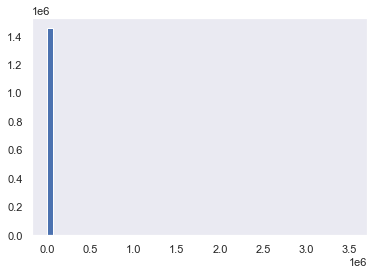

In [739]:
plt.hist(df['trip_duration'], bins=50)
plt.grid()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

<p><span style="color:blue"> <em>Есть выбросы - заказы на длинные расстояния (за город). </em> </span></p>

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

<p><span style="color:blue"> <em> Чтобы получить нормальное (логнормальное) распределение таргета. </em> </span></p>

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: 

Оптимизация RMSLE:
$$ \text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$
<p><span style="color:blue"> <em> Заменим $\hat{y}_i = \log{(y_i + 1)}$ и $\widetilde{a}(x_i) = \log{(a_i(x_i) + 1)}$ 
<span style="color:blue">  Тогда, задача оптимизации сводится к решению обычной MSE относительно $\widetilde{a}(x_i)$ </span>

<span style="color:blue">  Соотствественно, по определению  $\hat{a}(x_i) = \widetilde{a}(x_i) = \log{(a_i(x_i) + 1)}$ - предсказание модели линрег, которая обучалась на $\hat{y}_i$ и преобразования эквиваленты. </em> </span></p>

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

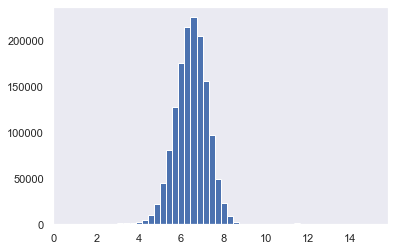

In [740]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
plt.hist(df['log_trip_duration'], bins=50)
plt.grid()
ost= df['trip_duration']
df = df.drop(['trip_duration'], axis = 1)

In [741]:
sum((df['log_trip_duration'] - np.mean(df['log_trip_duration']))**2)/len(df)

0.6332327625406583

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [742]:
baseline_0 = np.sqrt(sum((df['log_trip_duration'] - np.mean(df['log_trip_duration']))**2)/len(df))

In [743]:
baseline_0

0.7957592365412156

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [744]:
df['day'] = pd.to_datetime(df['pickup_datetime']).dt.date
df['day_num'] = pd.to_datetime(df['pickup_datetime']).dt.dayofyear
df['month'] = df['pickup_datetime'].dt.month_name()
df['weekday'] = df['pickup_datetime'].dt.day_name()
df['weeekday'] = df['pickup_datetime'].dt.weekday

df['hour'] = df['pickup_datetime'].dt.hour
df['anomal1'] = 0
df['anomal2'] = 0

df.loc[df['day'] == '2016-01-23' , 'anomal1'] = 1
df.loc[df['day'] == '2016-01-24' , 'anomal2'] = 1

In [745]:
df = df.sort_values(by = ['day'])

In [746]:
import matplotlib.dates as mdates

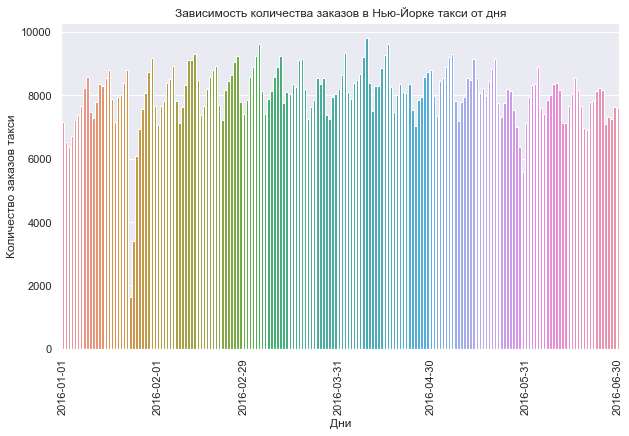

In [747]:
fig = plt.figure(figsize=(10,6))
months = mdates.MonthLocator()
ax = sns.countplot(x=df["day"])
ax.set(xlabel='Дни', ylabel='Количество заказов такси')
ax.xaxis.set_major_locator(months)

plt.xticks(rotation = 'vertical')
plt.title('Зависимость количества заказов в Нью-Йорке такси от дня')
plt.show()

In [748]:
v = df['weekday'].value_counts()[['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

Index([2016-01-23, 2016-01-24], dtype='object')


Text(0.5, 0.98, 'Зависимость количества заказов такси в Нью-Йорке от времени суток')

<Figure size 720x432 with 0 Axes>

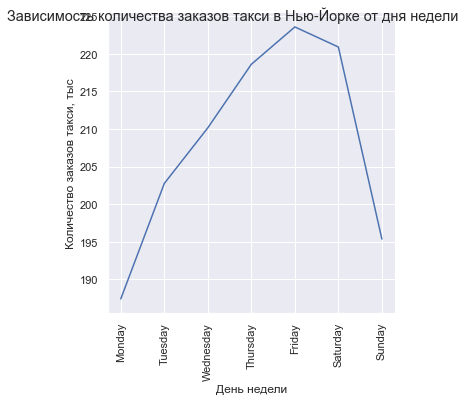

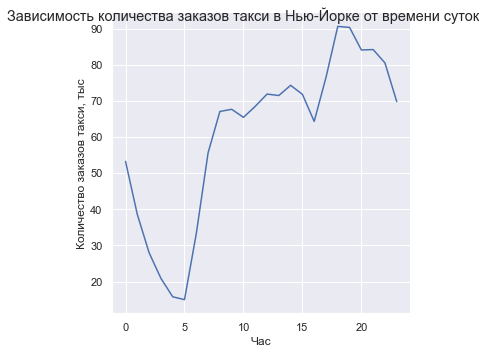

In [749]:
print(df['day'].value_counts(ascending=True)[0:2].index)
# Blizzard
fig = plt.figure(figsize=(10,6))
ax = sns.relplot(x=v.index, y = v/1000, kind="line")
ax.set(xlabel='День недели', ylabel='Количество заказов такси, тыс')
ax.figure.suptitle('Зависимость количества заказов такси в Нью-Йорке от дня недели')
plt.xticks(rotation = 'vertical')

plt2 = sns.relplot(x=df['hour'].value_counts().index, y = df['hour'].value_counts()/1000, kind="line")
plt2.set(xlabel='Час', ylabel='Количество заказов такси, тыс')
plt2.figure.suptitle('Зависимость количества заказов такси в Нью-Йорке от времени суток')


**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25')])

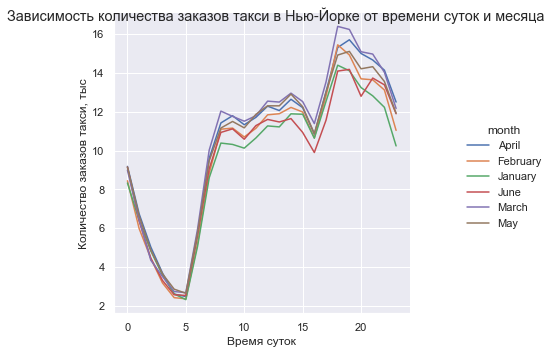

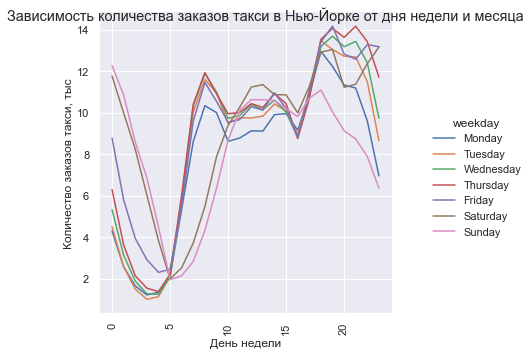

In [750]:
k = df.groupby([df['hour'], df['month']]).count()[['id']].reset_index()

plt1 = sns.relplot(x = k['hour'], y = k['id']/1000, kind = "line", hue = k['month'])
plt1.set(xlabel='Время суток', ylabel='Количество заказов такси, тыс')
plt1.figure.suptitle('Зависимость количества заказов такси в Нью-Йорке от времени суток и месяца')

k = df.groupby([df['weekday'], df['hour']]).count()[['id']].reset_index()
k['weekday'] =pd.Categorical(k['weekday'], ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
k=k.sort_values(['weekday'])

plt1 = sns.relplot(x = k['hour'], y = k['id']/1000, kind = "line", hue = k['weekday'])
plt1.set(xlabel='День недели', ylabel='Количество заказов такси, тыс')
plt1.figure.suptitle('Зависимость количества заказов такси в Нью-Йорке от дня недели и месяца')
plt.xticks(rotation = 'vertical')

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

### Разнонаправленная динамика для разных дней неедели: выделяется воскресенье, как самый "ленивый день" - меньше всего заказов такси, больше всего заказов в чт;в марте было больше всего заказов такси, в январе и июне меньше всего

In [751]:
#df = df.drop(columns=["id", 'vendor_id', 'pickup_datetime'])

Text(0.5, 0.98, 'Зависимость среднего логарифма продолжительности поездки в такси в Нью-Йорке от дня')

<Figure size 720x432 with 0 Axes>

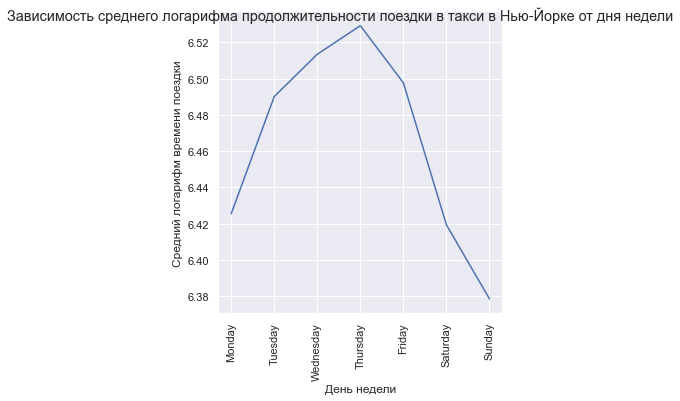

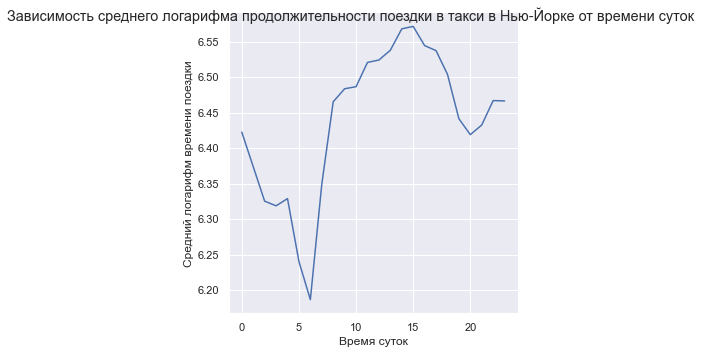

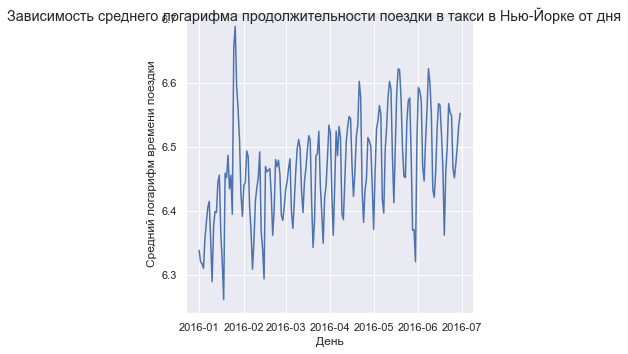

In [752]:
from sklearn.model_selection import train_test_split


c = df.groupby(df['weekday']).mean()[['log_trip_duration']].reset_index()


y = df["log_trip_duration"]
X = df.drop(columns="log_trip_duration")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

c = df.groupby(X_train['weekday']).mean()[['log_trip_duration']].reset_index()
c['weekday'] =pd.Categorical(c['weekday'], ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
c=c.sort_values('weekday')

fig = plt.figure(figsize=(10,6))

plt1 = sns.relplot(x=c['weekday'], y = c['log_trip_duration'], kind="line")
plt1.set(xlabel='День недели', ylabel='Средний логарифм времени поездки')
plt1.figure.suptitle('Зависимость среднего логарифма продолжительности поездки в такси в Нью-Йорке от дня недели')
plt.xticks(rotation = 'vertical')

z = df.groupby(df['hour']).mean()[['log_trip_duration']].reset_index()

plt2 = sns.relplot(x=z['hour'], y = z['log_trip_duration'], kind="line")
plt2.set(xlabel='Время суток', ylabel='Средний логарифм времени поездки')
plt2.figure.suptitle('Зависимость среднего логарифма продолжительности поездки в такси в Нью-Йорке от времени суток')

m = df.groupby(df['day']).mean()[['log_trip_duration']].reset_index()

plt2 = sns.relplot(x=m['day'], y = m['log_trip_duration'], kind="line")
plt2.set(xlabel='День', ylabel='Средний логарифм времени поездки')
plt2.figure.suptitle('Зависимость среднего логарифма продолжительности поездки в такси в Нью-Йорке от дня')




**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

<p><span style="color:blue"> <em>  Категориальные -  store_and_fwd_flag, day, month, weekday, hour, passenger_count </em> </span></p>

<p><span style="color:blue"> <em>     Численные - log_trip_duration  </em> </span></p>

<p><span style="color:blue"> <em>     Бинарные - добавленные переменные аномальных периодов </em> </span></p>

<p><span style="color:blue"> <em>     Особые переменные, требующие дополнительной обработки (не готовы к тому, чтобы включать их в регрессию) - ширина и долгота, убрала переменные айди и времени и дня начала поездки. Ширину и долготу надо учитывать в более агрегированном состоянии: постараться выделить район Нью Йорка и учесть в регрессии влияние "популярности района"  </em> </span></p>

In [753]:
categorial = ['store_and_fwd_flag','month', 'weekday', 'hour', 'passenger_count', 'day']

#X_train = X_train.drop(columns = 'day')
#X_test = X_test.drop(columns = 'day')

In [754]:
for i in categorial: 
    X_train[i] = X_train[i].astype('object') 
    X_test[i] = X_test[i].astype('object')

In [755]:
cats = X_train[categorial]
nums = X_train.loc[:,~X_train.columns.isin(cats)]

In [756]:
X_test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day,day_num,month,weekday,weeekday,hour,anomal1,anomal2
1057142,id3290152,2,2016-03-09 23:08:00,1,-73.993568,40.757160,-73.988419,40.734779,N,2016-03-09,69,March,Wednesday,2,23,0,0
1415875,id1369985,2,2016-03-17 20:52:47,1,-73.983742,40.760159,-73.990440,40.751068,N,2016-03-17,77,March,Thursday,3,20,0,0
1012699,id0006510,1,2016-03-17 23:27:41,1,-73.956863,40.783539,-73.958687,40.772327,N,2016-03-17,77,March,Thursday,3,23,0,0
96184,id2110817,2,2016-06-19 22:39:00,1,-74.000359,40.735149,-73.988571,40.746010,N,2016-06-19,171,June,Sunday,6,22,0,0
115554,id0914110,1,2016-03-26 15:07:59,2,-73.956856,40.786034,-73.970764,40.764652,N,2016-03-26,86,March,Saturday,5,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702708,id2830819,2,2016-02-27 14:45:03,1,-73.972191,40.781231,-73.952377,40.792320,N,2016-02-27,58,February,Saturday,5,14,0,0
1320424,id1733614,1,2016-06-15 18:05:51,2,-73.974129,40.759888,-73.961708,40.773609,N,2016-06-15,167,June,Wednesday,2,18,0,0
472050,id0957500,1,2016-06-04 19:40:37,1,-73.966988,40.793831,-73.936432,40.850239,N,2016-06-04,156,June,Saturday,5,19,0,0
164983,id3634831,2,2016-01-30 05:35:23,1,-73.985130,40.742081,-73.895004,40.748611,N,2016-01-30,30,January,Saturday,5,5,0,0


In [757]:
X_train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,day,day_num,month,weekday,weeekday,hour,anomal1,anomal2
725159,id1933150,1,2016-03-15 09:07:21,1,-73.998985,40.744507,-73.998055,40.753281,N,2016-03-15,75,March,Tuesday,1,9,0,0
473543,id1957342,2,2016-03-30 15:51:22,1,-73.991478,40.742439,-73.993378,40.736320,N,2016-03-30,90,March,Wednesday,2,15,0,0
328077,id3500488,2,2016-02-12 16:35:46,2,-73.965889,40.758747,-73.916977,40.671703,N,2016-02-12,43,February,Friday,4,16,0,0
429812,id0276113,2,2016-01-19 23:01:15,1,-73.965202,40.714226,-73.941475,40.674721,N,2016-01-19,19,January,Tuesday,1,23,0,0
932813,id0509476,2,2016-04-23 20:34:56,2,-73.955139,40.720798,-73.926949,40.687092,N,2016-04-23,114,April,Saturday,5,20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844529,id3369378,2,2016-06-03 07:54:13,1,-73.963959,40.808163,-73.942131,40.841770,N,2016-06-03,155,June,Friday,4,7,0,0
718930,id3040763,1,2016-05-12 00:48:49,2,-73.983353,40.726479,-73.932571,40.695366,N,2016-05-12,133,May,Thursday,3,0,0,0
1412536,id3173359,1,2016-01-05 23:01:08,1,-73.977425,40.787067,-73.946754,40.776375,N,2016-01-05,5,January,Tuesday,1,23,0,0
1281689,id0711005,1,2016-02-06 20:19:21,1,-73.974136,40.756332,-73.985489,40.755363,N,2016-02-06,37,February,Saturday,5,20,0,0


In [758]:
nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021050 entries, 725159 to 294700
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id                 1021050 non-null  object        
 1   vendor_id          1021050 non-null  int64         
 2   pickup_datetime    1021050 non-null  datetime64[ns]
 3   pickup_longitude   1021050 non-null  float64       
 4   pickup_latitude    1021050 non-null  float64       
 5   dropoff_longitude  1021050 non-null  float64       
 6   dropoff_latitude   1021050 non-null  float64       
 7   day_num            1021050 non-null  int64         
 8   weeekday           1021050 non-null  int64         
 9   anomal1            1021050 non-null  int64         
 10  anomal2            1021050 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 125.7+ MB


In [759]:
X_train = X_train[['store_and_fwd_flag','month', 'weekday', 'hour', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude']]


**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [760]:
!pip install transformers

In [761]:
X = df[['weekday', 'month', 'hour', 'anomal1', 'anomal2', 'day']]
y = df["log_trip_duration"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=123)


In [762]:
cats = X_train1[['weekday', 'month', 'hour', 'day']]
nums = X_train1.loc[:,~X_train1.columns.isin(cats)]

In [763]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from transformers import pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cats.columns),
    ('scaling', StandardScaler(), nums.columns)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train1, y_train1)
y_pred1 = model.predict(X_test1)

In [764]:
print("Test RMSE = %.4f" % mean_squared_error(y_test1, y_pred1, squared=False))

Test RMSE = 0.7872


In [765]:
baseline_0

0.7957592365412156

In [766]:
baseline_1 = mean_squared_error(y_test1, y_pred1, squared=False)

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [767]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [768]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [769]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

<p><span style="color:blue"> <em> Аэропорты Кеннеди и Элизабет </em> </span></p>

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [770]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df['haversine'] = haversine_array(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [771]:
df['log_haversine'] = np.log1p(df['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [772]:
X_ = df[['haversine', 'log_haversine']]

X_mean = X_.mean()
X_features = X_.columns

#X_train = X_train.fillna(numeric_data_mean)
#X_test = X_test.fillna(numeric_data_mean)

correlations = X_.corrwith(y).sort_values(ascending=False)


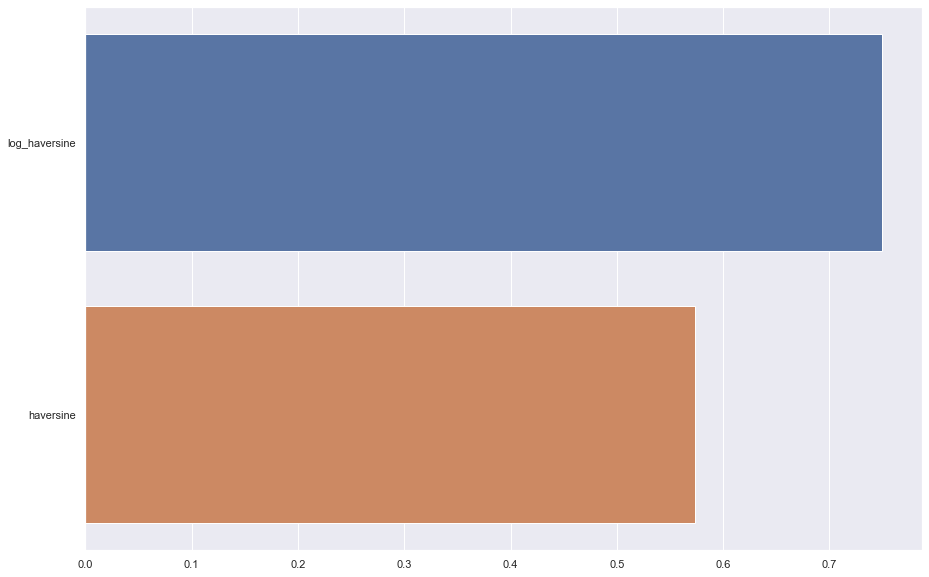

In [773]:
plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

(array([1.458569e+06, 4.000000e+01, 7.000000e+00, 5.000000e+00,
        7.000000e+00, 2.000000e+00, 4.000000e+00, 4.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([   0.        ,  185.49673462,  370.99346925,  556.49020387,
         741.9869385 ,  927.48367312, 1112.98040775, 1298.47714237,
        1483.973877  , 1669.47061162, 1854.96734625, 2040.

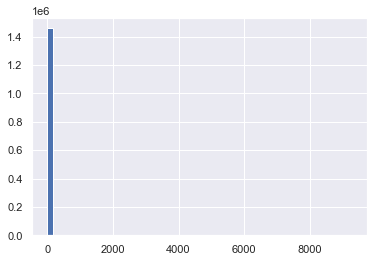

In [774]:
df['avg_speed'] = df['haversine']/ost*3600
plt.hist(df['avg_speed'], bins = 50)

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [775]:
quantile=[0.01,0.99]

Q01,Q99=df['avg_speed'].quantile(quantile).values.tolist()

df = df.loc[df['avg_speed']<= Q99,:]


(array([10831.,  1786.,  1361.,  1505.,  1821.,  2473.,  3534.,  4775.,
         6444.,  8408., 10883., 13371., 16415., 18953., 21755., 24764.,
        27637., 30034., 32988., 34672., 36649., 38279., 39798., 40515.,
        41037., 41273., 41762., 41017., 40985., 39736., 38731., 37798.,
        36089., 35201., 34148., 32249., 30788., 29568., 27798., 26655.,
        25447., 24001., 22918., 21284., 20231., 19048., 17972., 16935.,
        16063., 15212., 14425., 13540., 12751., 11892., 11365., 10518.,
         9971.,  9447.,  8804.,  8367.,  7878.,  7359.,  7036.,  6615.,
         6246.,  5840.,  5697.,  5366.,  4868.,  4580.,  4299.,  4240.,
         3933.,  3831.,  3525.,  3275.,  3120.,  3008.,  2853.,  2698.,
         2634.,  2400.,  2324.,  2205.,  2049.,  1986.,  1880.,  1752.,
         1701.,  1654.,  1521.,  1524.,  1423.,  1314.,  1266.,  1235.,
         1148.,  1140.,   991.,   966.]),
 array([ 0.        ,  0.40745229,  0.81490458,  1.22235687,  1.62980916,
         2.03726145, 

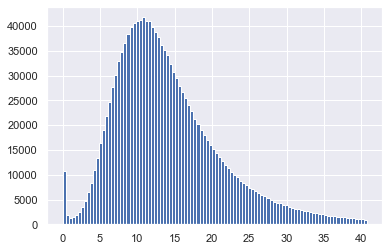

In [776]:
plt.hist(df['avg_speed'], bins = 100)

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<AxesSubplot:xlabel='weekday', ylabel='hour'>

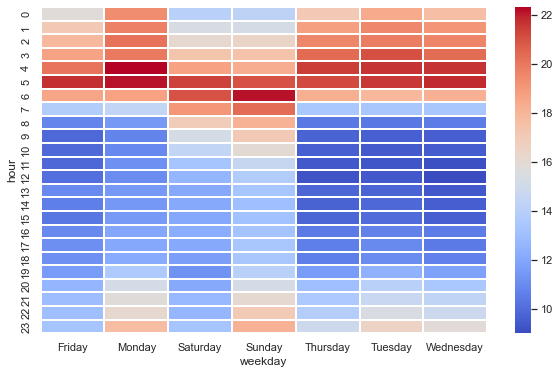

In [777]:
k = df.groupby(['weekday', 'hour']).median()['avg_speed'].unstack(level = 0)

plt.figure(figsize=(10,6)) 
sns.heatmap(k, linewidths=.3, cmap="coolwarm")


Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?


### Первая мысль: Мы можем идеально предсказать таргет, потому что расчитывали скорость от него и расстояния. По факту получим идеальную модель) Но на тесте так не выйдет, потому что:
#### Вторая мысль: на тесте мы скорость не посчитаем)))

### Поэтому бесполезно включать скорость, это расчетный параметр от таргета и одного из регрессоров


<AxesSubplot:xlabel='weekday', ylabel='hour'>

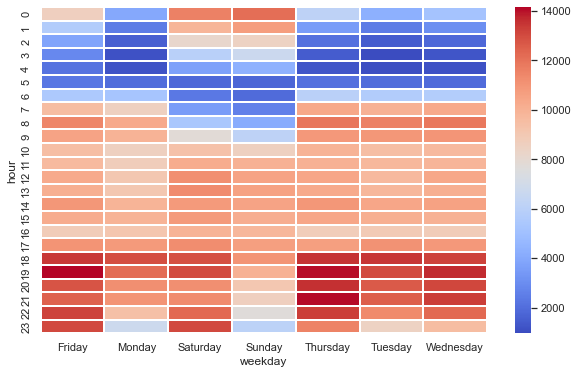

In [778]:
#Для определения пробок - то, где много заказов) Для каждого дня недели разное
k = df.groupby(['weekday', 'hour']).count()['avg_speed'].unstack(level = 0)
plt.figure(figsize=(10,6)) 
sns.heatmap(k, linewidths=.3, cmap="coolwarm")

In [779]:
df = df.drop(columns = ['avg_speed'])

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

### Минимум скорости в течение дня - с 9 до 20 в среднем, дороги перегружены. Максимум по ночам, когда никто не ездит)

In [780]:
# долго считаетя, не особо эффективно написала. Идея в том, чтобы в каждом дне выделить топ2 по количеству заказов (и антитоп)
df['traffic_jams'] = 0
df['no_traffic_jams'] = 0

for day in df['day'].unique():
    
    day_df = df.loc[df['day'] == day,:]
    
    c = day_df.groupby('hour').agg('count')['log_trip_duration'].sort_values(ascending =False).reset_index()[0:2]
    d = day_df.groupby('hour').agg('count')['log_trip_duration'].sort_values(ascending =True).reset_index()[0:2]
    
    df.loc[(df['day'] == day) & (df['hour'].isin(c['hour'])), 'traffic_jams'] = 1
    df.loc[(df['day'] == day) & (df['hour'].isin(d['hour'])), 'no_traffic_jams'] = 1



In [781]:
sum(df['traffic_jams']* df['no_traffic_jams']) #не пересекаются

0

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [782]:
kennedy = [40.641766, -73.780968]
elizabet = [40.6895314, -74.1744623999]

In [783]:
# Возьмем окрестности аэропортов. Для Элизабет больше, опытным путем было выяснено, что он 
# менее популярный видимо, там меньше точек

df['dropoff_kennedy'] = (haversine_array(kennedy[0], kennedy[1], df['dropoff_latitude'].values, df['dropoff_longitude'].values)<0.5).astype(int)
df['pickup_kennedy'] = (haversine_array(kennedy[0], kennedy[1], df['pickup_latitude'].values, df['pickup_longitude'].values)<0.5).astype(int)

df['dropoff_elizabet'] = (haversine_array(elizabet[0], elizabet[1], df['dropoff_latitude'].values, df['dropoff_longitude'].values)<1).astype(int)
df['pickup_elizabet'] = (haversine_array(elizabet[0], elizabet[1], df['pickup_latitude'].values, df['pickup_longitude'].values)<1).astype(int)



In [784]:
sum(df['pickup_kennedy'])

8750

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

Text(0.5, 0.98, 'Забрали в аэропорте Кеннеди')

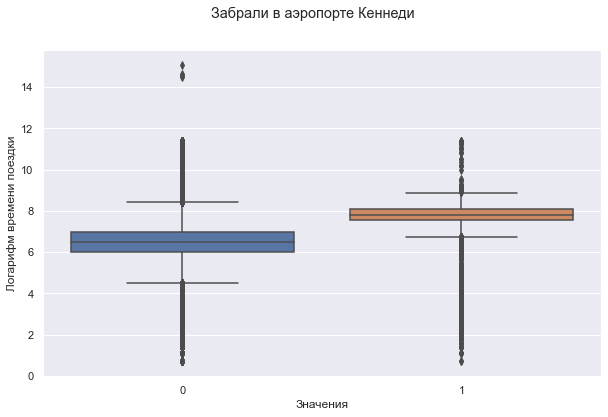

In [785]:
fig = plt.figure(figsize=(10,6))

plt1 = sns.boxplot(data=df, x=df['pickup_kennedy'], y='log_trip_duration')
plt1.set(xlabel='Значения', ylabel='Логарифм времени поездки')
plt1.figure.suptitle('Забрали в аэропорте Кеннеди')



Text(0.5, 0.98, 'Приехал в аэропорт Кеннеди')

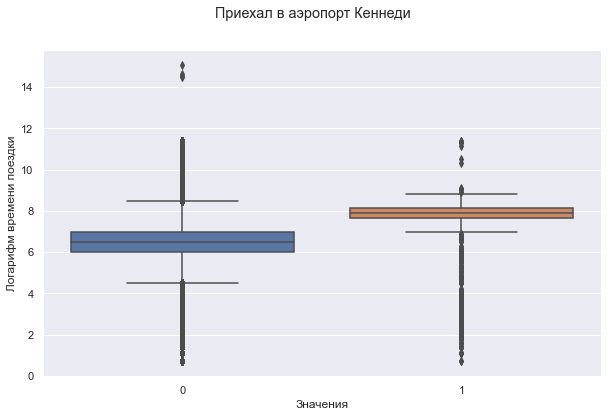

In [786]:
fig = plt.figure(figsize=(10,6))

plt2 = sns.boxplot(data=df, x=df['dropoff_kennedy'], y='log_trip_duration')
plt2.set(xlabel='Значения', ylabel='Логарифм времени поездки')
plt2.figure.suptitle('Приехал в аэропорт Кеннеди')
#sns.boxplot(data=df, x=df['pickup_kennedy'], y='log_trip_duration')



Text(0.5, 0.98, 'Забрали в аэропорту Элизабет')

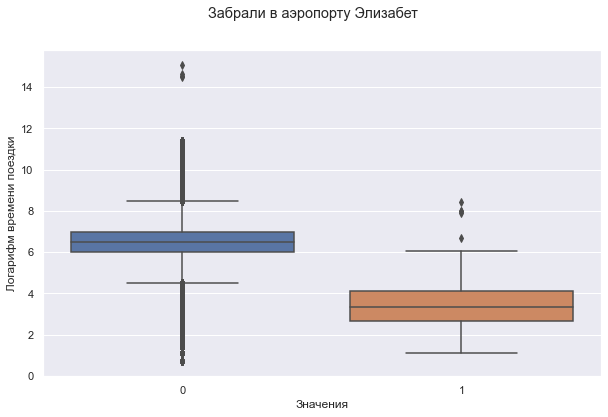

In [787]:
fig = plt.figure(figsize=(10,6))

plt2 = sns.boxplot(data=df, x=df['pickup_elizabet'], y='log_trip_duration')
plt2.set(xlabel='Значения', ylabel='Логарифм времени поездки')
plt2.figure.suptitle('Забрали в аэропорту Элизабет')
#sns.boxplot(data=df, x=df['pickup_kennedy'], y='log_trip_duration')




Text(0.5, 0.98, 'Приехал в аэропорт Элизабет')

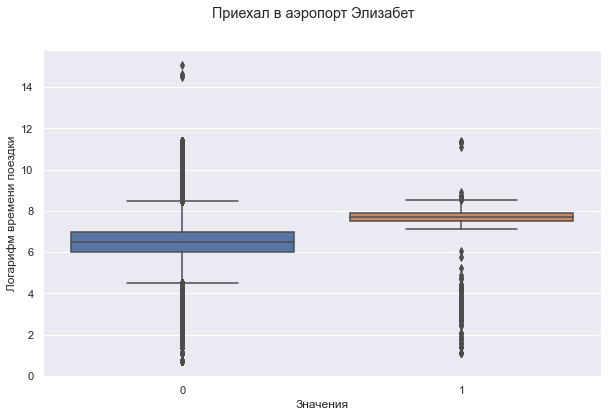

In [788]:
fig = plt.figure(figsize=(10,6))

plt2 = sns.boxplot(data=df, x=df['dropoff_elizabet'], y='log_trip_duration')
plt2.set(xlabel='Значения', ylabel='Логарифм времени поездки')
plt2.figure.suptitle('Приехал в аэропорт Элизабет')
#sns.boxplot(data=df, x=df['pickup_kennedy'], y='log_trip_duration')


**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

#### Ну в целом норм: среднее для разных значений различное, как и разброс

In [789]:
sum(df['pickup_elizabet'])

101

#### Как-то не особо, время из города до аэропорта Элизабет достаточно низкое, ниже среднего по остальным значениям, но при этом из аэропорта в город выше среднего, что не интуитивно. Ожидала выше среднего для всех графиков, тк до аэропорта ехать должно быть дольше) Особенно аэропорт Элизабет как будто сильно дальше аэропорта Кеннеди. Возможно, результаты получились смещенными, тк мало точек (всего 103 на миллион остальной выборки, большой ДИ). 

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [790]:
mh = np.array([
              [40.703314, -74.018608],
              [40.703314, -73.934241],
              [40.791438, -73.934241],
              [40.791438, -74.018608]
               ])

In [968]:
mh

array([[ 40.703314, -74.018608],
       [ 40.703314, -73.934241],
       [ 40.791438, -73.934241],
       [ 40.791438, -74.018608]])

In [791]:
col = 4
row = 5
m = show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")
   

In [966]:
def k(mh, row=5, col=4):
    """Инициализация глобальных переменных (количество строк и столбцов) и считывание коробки Манхеттена"""
   

    # Зададим ширину и длину квадратика деления
    sq_lat, sq_lon = [(mh[:, 0].max() - mh[:, 0].min()) / col, \
              (mh[:, 1].max() - mh[:, 1].min()) / row]
    return sq_lat, sq_lon

In [967]:
k(mh, row=5, col=4)

(0.022031000000000134, 0.01687340000000006)

## В общем, я честно пыталась написать класс, вот мои попытки в блоке ниже, но я не разобралась с ошибками( И не особо понимаю пока ООП. Я старалась. В итоге реализовала набором функций (см блоки ниже). 

P. S. брала за идею код отсюда: но он вообще-то не рабочий))) искала центры квадратов деления и от них строила сами квадраты https://ru.stackoverflow.com/questions/1161594/Разбиение-области-на-ячейки-и-присвоение-меток-с-началом-и-концом

In [984]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    """Класс, который расчерчивает карту на квадратики и присваивает индексы"""
    
    def __init__(self, X, m):
        """Инициализация глобальных переменных (количество строк и столбцов) и считывание коробки Манхеттена"""
        self.mh = mh
        self.col = col
        self.row = row
        
        # Зададим ширину и длину квадратика деления
        sq_lat, sq_lon = [(mh[:, 0].max().astype('float')  - mh[:, 0].min().astype('float') ) / self.col, \
                  (mh[:, 1].max().astype('float')  - mh[:, 1].min().astype('float') ) / self.row]
     
    # центры квадратиков
    def get_centers(self):
        
        col = self.col
        row = self.row
        mh = self.mh

        cntr = [[[[mh[:, 0].min() + i * self.sq_lat/2], [mh[:, 1].min() + j * self.sq_lon /2]] \
                 for i in range (1, 2*col,2) for j in range (1, 2*row,2) ]]

    # создать квадратик по центру
        boxes = {}
        for i in range (col*row):
            center = cntr[:, i]
            top_left = [center[0] + self.sq_lat/2 ,center[1] - self.sq_lon[1]/2]
            top_right = [center[0] + self.sq_lat/2 ,center[1] + self.sq_lon[1]/2]
            bottom_left = [center[0] - self.sq_lat/2 ,center[1] - self.sq_lon[1]/2]
            bottom_right = [center[0] - self.sq_lat/2 ,center[1] + self.sq_lon[1]/2]
            bbox = [top_left,top_right,bottom_left,bottom_right]
            bbox = np.array(bbox)
            boxes[i] = bbox
        
        return boxes
    
    def draw_map(self, m):
    #"""Рисуем сетку на карте с точками поездок"""
        for i in range(len(self.cntr[1,:])):
            folium.Circle(
                radius=100,
                location=(self.cntr[0, i], self.cntr[1, i]),
                color='yellow',
                fill_color='yellow',
                fill=True
            ).add_to(m)

            folium.Rectangle(self.boxes[i],
                       color="red",
                       weight=2,
                       fill=True,
                       fill_opacity=0).add_to(m)
        return m

    def fit(self, X, y=None):
        self.X = X
        

    def transform(self, df, long, lat, index_name):
    #"""Получаем индексы для квадратиков """
    
        X = df.copy()
        X[index_name] = -1
        for i in range(self.col*self.row):

            X.loc[(X[lat] > self.boxes[i][3][0]) & (X[lat] < self.boxes[i][1][0]) & \
                (X[long] < self.boxes[i][3][1]) & (X[long] > self.boxes[i][0][1]), index_name] = i

        return X

    def fit_transform(self, df, y=None):
        self.fit(df)
        X = self.transform(self.df)
        
        return X

In [985]:
lat = 'pickup_latitude'
long = 'pickup_longitude'
index_name = 'pickup_index'

In [986]:
transformer = MapGridTransformer(df, m)#, 'pickup_longitude', 'pickup_latitude', 'pichup_index')
df = transformer.fit_transform(df)



TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [796]:
# Получить ширину и длину квадратика деления
def square_params(mh, col, row):
    sq = [(mh[:, 0].max() - mh[:, 0].min()) / col, \
                  (mh[:, 1].max() - mh[:, 1].min()) / row]
    return sq

In [797]:
sq = square_params(mh, col, row)

In [798]:
# центры квадратиков
def sq_center(col, row, sq, mh):
    box = [[], []]
    for i in range (1, 2*col,2):
        for j in range (1, 2*row,2):

            box = np.append(box, [[mh[:, 0].min() + i * sq[0]/2], [mh[:, 1].min() + j * sq[1]/2]], axis = 1)
            
    return box

In [799]:
bb = sq_center(col, row, sq, mh)

In [800]:
# создать квадратик по центру
def create_box(col, row, bb, sq):
    boxes = {}
    for i in range (col*row):
        center = bb[:, i]
        top_left = [center[0] + sq[0]/2 ,center[1] - sq[1]/2]
        top_right = [center[0] + sq[0]/2 ,center[1] + sq[1]/2]
        bottom_left = [center[0] - sq[0]/2 ,center[1] - sq[1]/2]
        bottom_right = [center[0] - sq[0]/2 ,center[1] + sq[1]/2]
        bbox = [top_left,top_right,bottom_left,bottom_right]
        bbox = np.array(bbox)
        boxes[i] = bbox
    return boxes

In [801]:
boxes = create_box(col, row, bb, sq)

In [802]:
def draw_map(bb, boxes):
    m = show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")
    #location = (bb[0, :].mean(), bb[1, :].mean())
    #m = folium.Map(location=location)

    for i in range(len(bb[1,:])):
        folium.Circle(
            radius=100,
            location=(bb[0, i], bb[1, i]),
            color='yellow',
            fill_color='yellow',
            fill=True
        ).add_to(m)

        folium.Rectangle(boxes[i],
                   color="red",
                   weight=2,
                   fill=True,
                   fill_opacity=0).add_to(m)
    return m


In [803]:
draw_map(bb, boxes)

In [804]:
def get_index(df, long, lat, boxes, index_name):

    df[index_name] = -1
    for i in range(col*row):

        df.loc[(df[lat] > boxes[i][3][0]) & (df[lat] < boxes[i][1][0]) & \
            (df[long] < boxes[i][3][1]) & (df[long] > boxes[i][0][1]), index_name] = i
    
    return df

In [805]:
df = get_index(df, 'pickup_longitude', 'pickup_latitude', boxes, 'pickup_index')
df = get_index(df, 'dropoff_longitude', 'dropoff_latitude', boxes, 'dropoff_index')

In [806]:
len(df.loc[df['pickup_index'] == df['dropoff_index'],:])/len(df) 
#20% поездок заканчиваются в том же квадратике, в целом норм деление

0.20431187965571995

In [807]:
print(len(df.loc[df['pickup_index']==-1,:])/len(df))
print(len(df.loc[df['dropoff_index']==-1,:])/len(df))
# <15% выборки за пределами манхеттена, норм

0.10792371769258416
0.15512130061347995


In [808]:
df = df.drop(columns = ['pickup_datetime', 'id', 'pickup_longitude', 'pickup_latitude', \
                   'dropoff_longitude', 'dropoff_latitude', 'haversine', 'weeekday', 'day'])


In [809]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444057 entries, 333752 to 849051
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1444057 non-null  int64  
 1   passenger_count     1444057 non-null  int64  
 2   store_and_fwd_flag  1444057 non-null  object 
 3   log_trip_duration   1444057 non-null  float64
 4   day_num             1444057 non-null  int64  
 5   month               1444057 non-null  object 
 6   weekday             1444057 non-null  object 
 7   hour                1444057 non-null  int64  
 8   anomal1             1444057 non-null  int64  
 9   anomal2             1444057 non-null  int64  
 10  log_haversine       1444057 non-null  float64
 11  traffic_jams        1444057 non-null  int64  
 12  no_traffic_jams     1444057 non-null  int64  
 13  dropoff_kennedy     1444057 non-null  int64  
 14  pickup_kennedy      1444057 non-null  int64  
 15  dropoff_eli

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [810]:
X = df[['weekday', 'month', 'hour', 'anomal1', 'anomal2', 'day_num', 'pickup_index', 'dropoff_index', \
        'traffic_jams', 'no_traffic_jams', 'dropoff_kennedy', 'pickup_kennedy', \
       'dropoff_elizabet', 'pickup_elizabet', 'log_haversine']]
y = df["log_trip_duration"]

In [811]:
nums = ['log_haversine']
cats = ['weekday', 'month', 'hour', 'anomal1', 'anomal2', 'day_num', 'pickup_index', 'dropoff_index', \
        'traffic_jams', 'no_traffic_jams', 'dropoff_kennedy', 'pickup_kennedy', \
       'dropoff_elizabet', 'pickup_elizabet']
# в cats не добавляю бинарки, тк их уже не надо энкодить, а от стандартизации ничего не изменится значительного

Код с семинара Соколова

In [812]:
for col in cats:
    X[col] = X[col].astype('object')

/var/folders/t6/9f9frnss6fn9xmc7m_w9qqtw0000gn/T/ipykernel_15473/1382254459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('object')


In [813]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=123)

In [814]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cats),
    ('scaling', StandardScaler(), nums)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train2, y_train2)
y_pred2 = model.predict(X_test2)

In [815]:
model_1 = mean_squared_error(y_test2, y_pred2, squared=False)

In [816]:
model_1

0.4719566794912751

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

vendor_id - каждая фирма обладает уникальными фичами: алгоритмы оптимизации пути, сбора заказов и тд. Это напрямую влияет на время поездки

passenger_count - если несколько пассажиров, возможно они долго собираются, чтобы сесть в такси, их нужно отвозить на разные точки и соответственно останавливаться для высадки, это тоже влияет на время поездки

store_and_fwd_flag - что это?)

In [817]:
print(len(np.unique(df['vendor_id'])))
print(len(np.unique(df['passenger_count'])))
print(len(np.unique(df['store_and_fwd_flag'])))

2
9
2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

Text(0.5, 0.98, 'Айди компании перевозчика')

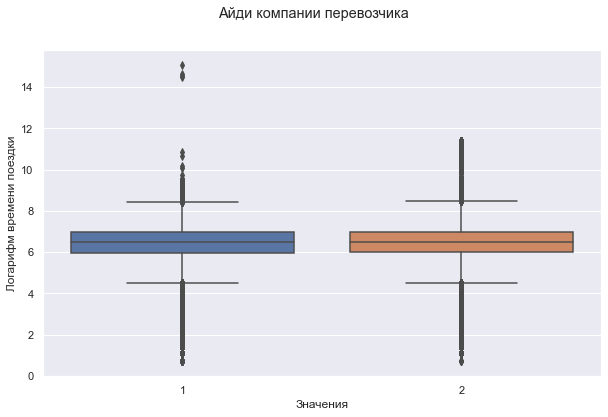

In [818]:
fig = plt.figure(figsize=(10,6))

plt1 = sns.boxplot(data=df, x=df['vendor_id'], y='log_trip_duration')
plt1.set(xlabel='Значения', ylabel='Логарифм времени поездки')
plt1.figure.suptitle('Айди компании перевозчика')
#sns.boxplot(data=df, x=df['pickup_kennedy'], y='log_trip_duration')


Text(0.5, 0.98, 'Количество пассажиров')

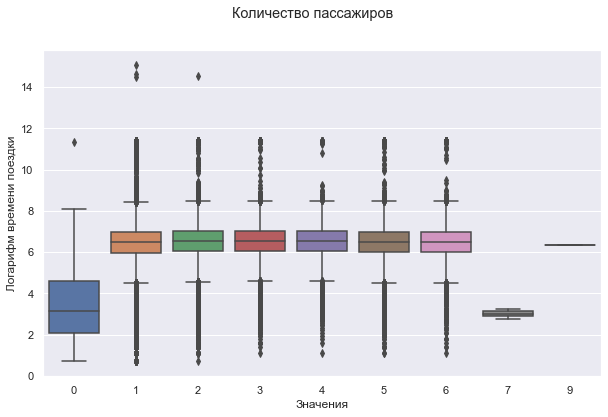

In [819]:
fig = plt.figure(figsize=(10,6))

plt2 = sns.boxplot(data=df, x=df['passenger_count'], y='log_trip_duration')
plt2.set(xlabel='Значения', ylabel='Логарифм времени поездки')
plt2.figure.suptitle('Количество пассажиров')
#sns.boxplot(data=df, x=df['pickup_kennedy'], y='log_trip_duration')


Text(0.5, 0.98, 'store_and_fwd_flag')

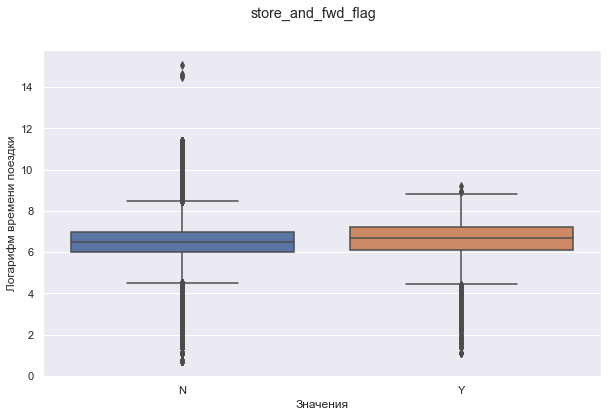

In [820]:
fig = plt.figure(figsize=(10,6))

plt1 = sns.boxplot(data=df, x=df['store_and_fwd_flag'], y='log_trip_duration')
plt1.set(xlabel='Значения', ylabel='Логарифм времени поездки')
plt1.figure.suptitle('store_and_fwd_flag')
#sns.boxplot(data=df, x=df['pickup_kennedy'], y='log_trip_duration')


Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [821]:
df = df.join(pd.get_dummies(df['store_and_fwd_flag']))
df = df.join(pd.get_dummies(df['vendor_id']))

In [822]:
df = df.drop(columns = ['store_and_fwd_flag', 'vendor_id'])

In [823]:
df = df.rename(columns={1: "id1", 2: "id2"})

In [824]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444057 entries, 333752 to 849051
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   passenger_count    1444057 non-null  int64  
 1   log_trip_duration  1444057 non-null  float64
 2   day_num            1444057 non-null  int64  
 3   month              1444057 non-null  object 
 4   weekday            1444057 non-null  object 
 5   hour               1444057 non-null  int64  
 6   anomal1            1444057 non-null  int64  
 7   anomal2            1444057 non-null  int64  
 8   log_haversine      1444057 non-null  float64
 9   traffic_jams       1444057 non-null  int64  
 10  no_traffic_jams    1444057 non-null  int64  
 11  dropoff_kennedy    1444057 non-null  int64  
 12  pickup_kennedy     1444057 non-null  int64  
 13  dropoff_elizabet   1444057 non-null  int64  
 14  pickup_elizabet    1444057 non-null  int64  
 15  pickup_index       1444057 n

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?


#### `id_vendor` - компании - перевозчики довольно похожи между собой по показателям среднй продолжительности пути. Поэтому, кажется, нет смысла их разделять и признак "слабый". Единственное, 1 перевозчик чаще ездит на дальние расстояния

#### `passenger_count` - аналогично, довольно похожие значения для 1-6 пассажиров (для 1 чуть поменьше), для 9 мало наблюдений, как видимо и для 7-ми. Признак "слабый" - лучше сделать дамми: есть пассажир, нет пассажира (доставка), потому что между ними различия более явные

#### `store_and_fwd_flag` - средние значения для двух групп почти не отличаются, поэтому значимого влияния быть не должно

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [825]:
X = df[['weekday', 'month', 'hour', 'anomal1', 'anomal2', 'day_num', 'pickup_index', 'dropoff_index', \
        'traffic_jams', 'no_traffic_jams', 'dropoff_kennedy', 'pickup_kennedy', \
       'dropoff_elizabet', 'pickup_elizabet', 'log_haversine', 'N', 'Y', 'id1', 'id2']]
y = df["log_trip_duration"]

nums = ['log_haversine']
cats = ['weekday', 'month', 'hour', 'anomal1', 'anomal2', 'day_num', 'pickup_index', 'dropoff_index', \
        'traffic_jams', 'no_traffic_jams', 'dropoff_kennedy', 'pickup_kennedy', \
       'dropoff_elizabet', 'pickup_elizabet', 'N', 'Y', 'id1', 'id2']
# в cats не добавляю бинарки, тк их уже не надо энкодить, а от стандартизации ничего не изменится значительного
for col in cats:
    X[col] = X[col].astype('object')

/var/folders/t6/9f9frnss6fn9xmc7m_w9qqtw0000gn/T/ipykernel_15473/2127252112.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('object')


In [826]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010839 entries, 11680 to 288685
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   weekday           1010839 non-null  object 
 1   month             1010839 non-null  object 
 2   hour              1010839 non-null  object 
 3   anomal1           1010839 non-null  object 
 4   anomal2           1010839 non-null  object 
 5   day_num           1010839 non-null  object 
 6   pickup_index      1010839 non-null  object 
 7   dropoff_index     1010839 non-null  object 
 8   traffic_jams      1010839 non-null  object 
 9   no_traffic_jams   1010839 non-null  object 
 10  dropoff_kennedy   1010839 non-null  object 
 11  pickup_kennedy    1010839 non-null  object 
 12  dropoff_elizabet  1010839 non-null  object 
 13  pickup_elizabet   1010839 non-null  object 
 14  log_haversine     1010839 non-null  float64
dtypes: float64(1), object(14)
memory usage: 123.4+

In [827]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=123)

In [828]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), cats),
    ('scaling', StandardScaler(), nums)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train2, y_train2)
y_pred3 = model.predict(X_test2)

In [829]:
model_2 = mean_squared_error(y_test2, y_pred3, squared=False)

In [830]:
model_2 

0.4718137913203202

In [831]:
model_1

0.4719566794912751

#### Пусть будут) мб не все, подумаю ниже об этом

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

<AxesSubplot:xlabel='log_trip_duration', ylabel='Count'>

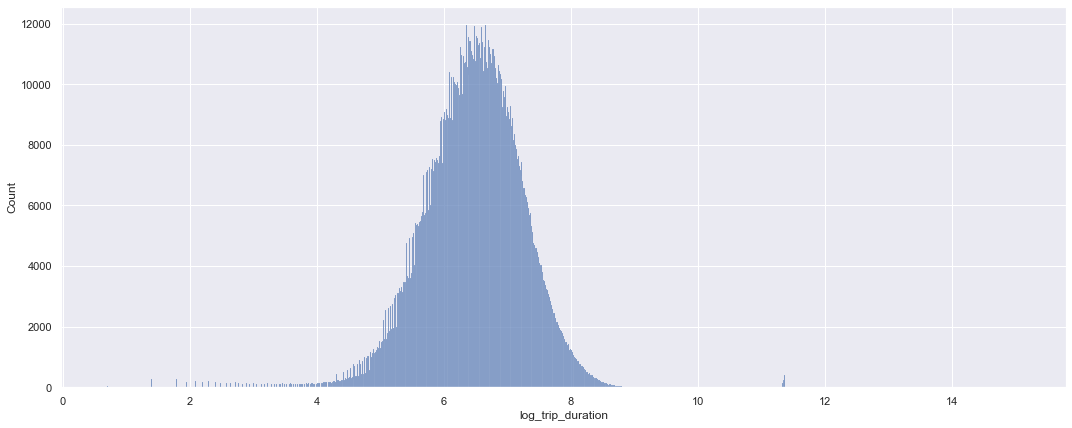

In [832]:
fig = plt.figure(figsize=(18,7))
sns.histplot(df['log_trip_duration'], bins = 1000)

<AxesSubplot:xlabel='log_trip_duration', ylabel='Count'>

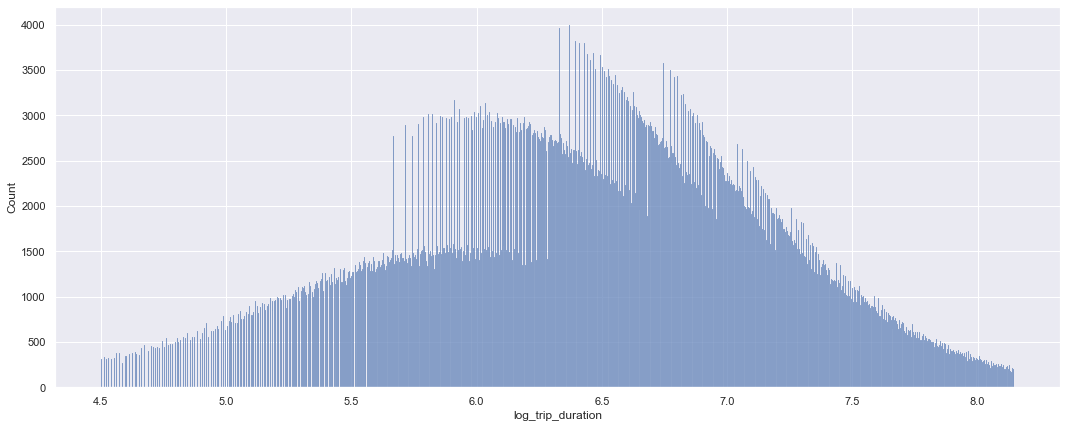

In [833]:
quantile=[0.01,0.99]

Q01,Q99=df['log_trip_duration'].quantile(quantile).values.tolist()

df = df.loc[(df['log_trip_duration']<= Q99) & (df['log_trip_duration']>= Q01),:]

fig = plt.figure(figsize=(18,7))
sns.histplot(df['log_trip_duration'], bins = 1000)

<AxesSubplot:xlabel='log_haversine', ylabel='Count'>

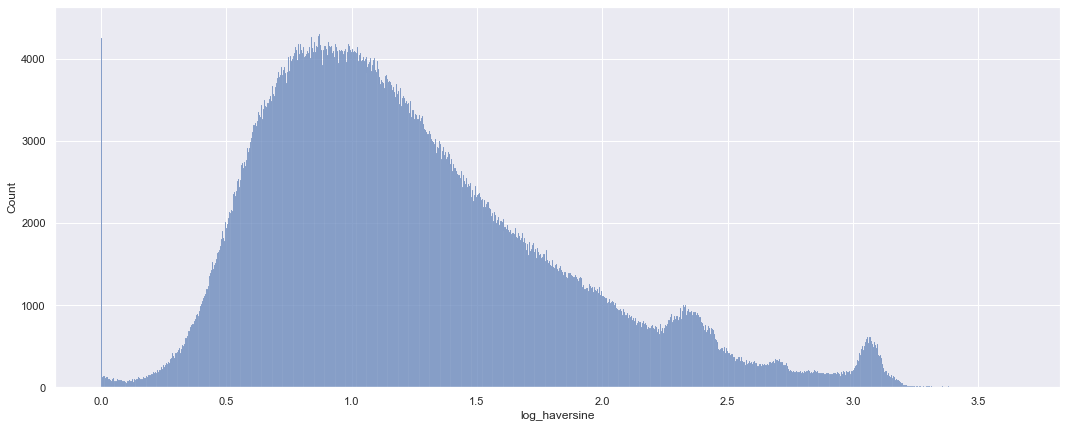

In [834]:
fig = plt.figure(figsize=(18,7))
sns.histplot(df['log_haversine'], bins = 1000)

<AxesSubplot:xlabel='log_haversine', ylabel='Count'>

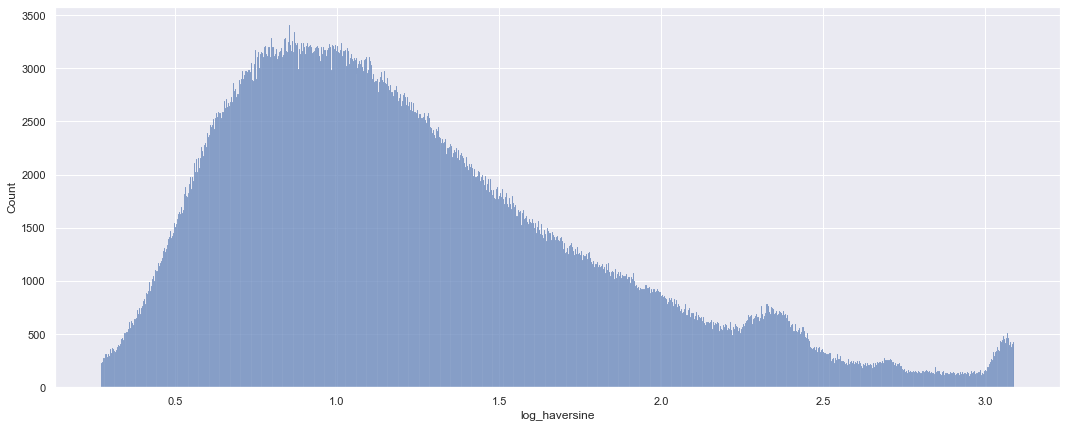

In [835]:
quantile=[0.01,0.995]

Q01,Q99=df['log_haversine'].quantile(quantile).values.tolist()

df = df.loc[(df['log_haversine']<= Q99) & (df['log_haversine']>= Q01),:]

fig = plt.figure(figsize=(18,7))
sns.histplot(df['log_haversine'], bins = 1000)

In [836]:
df[['weekday', 'month', 'hour', 'day_num']]

,weekday,month,hour,day_num
333752,Friday,January,1,1
616306,Friday,January,13,1
1391034,Friday,January,15,1
537651,Friday,January,12,1
397154,Friday,January,16,1
...,...,...,...,...
1061088,Thursday,June,21,182
1061098,Thursday,June,18,182
1253084,Thursday,June,15,182
1268014,Thursday,June,0,182


In [837]:
one_hot_encoded_data = pd.get_dummies(df[['weekday', 'month', 'hour', 'day_num']])

In [838]:
dff = pd.concat([df, one_hot_encoded_data], axis = 1)

In [839]:
dff = df.drop(columns = ['weekday', 'month', 'hour', 'day_num'])

In [840]:
x = dff.drop(columns=['log_trip_duration'])
y = dff['log_trip_duration']
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.3, random_state=123)


In [841]:
ridge = Ridge().fit(X_train2, y_train2) # остатки будем считать на базовой модели из первой части
pred = ridge.predict(X_train2)
#print(pred[:,0])
X_train2['fitted_vals'] = pred#[:,0]
X_train2['y'] = y_train2
X_train2['square_resid'] = np.square(X_train2['fitted_vals'] - X_train2['y'])

<AxesSubplot:xlabel='square_resid', ylabel='Count'>

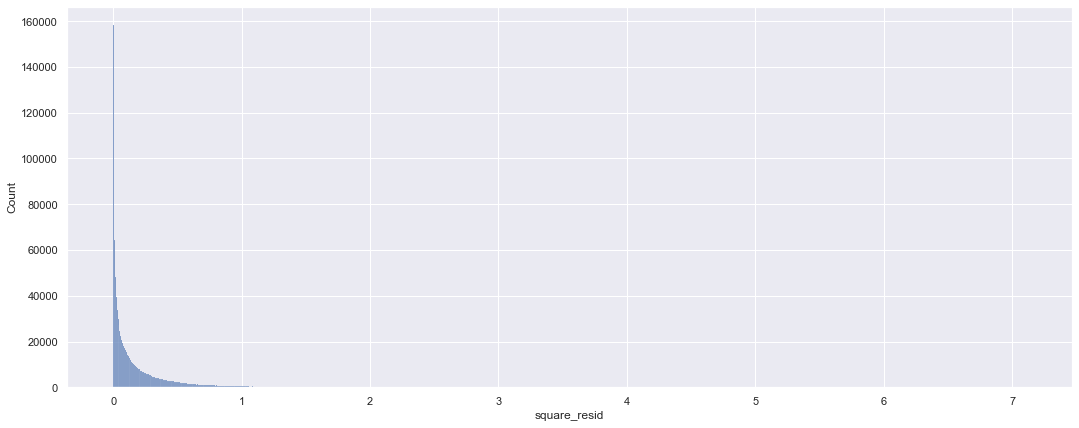

In [842]:
fig = plt.figure(figsize=(18,7))
sns.histplot(X_train2['square_resid'], bins = 1000)


<AxesSubplot:xlabel='square_resid', ylabel='Count'>

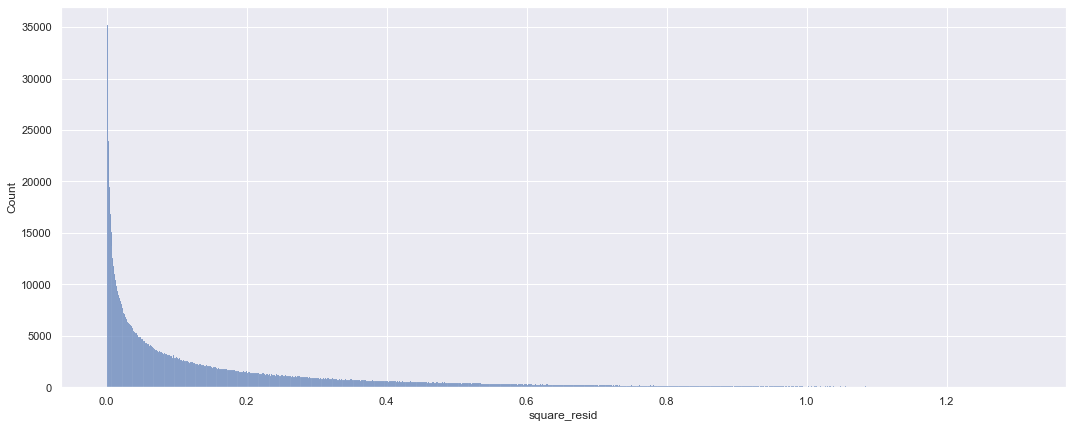

In [843]:
quantile=[0.05,0.99]

Q01,Q99=X_train2['square_resid'].quantile(quantile).values.tolist()

X_train2 = X_train2.loc[(X_train2['square_resid']<= Q99) & (X_train2['square_resid']>= Q01),:]

fig = plt.figure(figsize=(18,7))
sns.histplot(X_train2['square_resid'], bins = 1000)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

Во-первых, переменная `day_num` - 170 переменных это сразу же мультиколлинеарность + лишняя информация, редкие категории и все такое. Раобъем дни на 4 категории: 25% самых загруженных дней ... 25% самых не загруженных дней

Далее переменная `passenger_count` - видели по боксплоту, что есть разница только для доставки (0 пассажиров). Поэтому оставим 2 признака - есть и нет пассажиров

Переменные `anomal1` и `anomal2` - объедним в одну

По аэропортам создам переменную Elizabet и Kennedy, как сумму столбцов pickup и dropoff для каждого аэропорта. Чтобы избавиться от редких категорий (всего 103 значения pickup_elizabet)

Переменная `store_and_fwd_flag` не значимо различаются средние для значений, убираем

`id_vendor` - тоже убираем


In [844]:
x= df

In [912]:
df 

,passenger_count,log_trip_duration,day_num,month,weekday,hour,anomal1,anomal2,log_haversine,traffic_jams,...,N,Y,id1,id2,delivery,people,day_num_Q0,day_num_Q1,day_num_Q2,day_num_Q3
333752,1,5.616771,1,January,Friday,1,0,0,0.841232,1,...,1,0,1,0,0,1,1,0,0,0
616306,1,6.122493,1,January,Friday,13,0,0,1.027252,0,...,1,0,1,0,0,1,1,0,0,0
1391034,1,6.976348,1,January,Friday,15,0,0,1.715549,0,...,1,0,1,0,0,1,1,0,0,0
537651,2,6.293419,1,January,Friday,12,0,0,1.242020,0,...,1,0,0,1,0,1,1,0,0,0
397154,1,6.107023,1,January,Friday,16,0,0,1.150549,0,...,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061088,1,5.968708,182,June,Thursday,21,0,0,0.748596,1,...,1,0,1,0,0,1,1,0,0,0
1061098,1,8.032035,182,June,Thursday,18,0,0,2.090622,0,...,1,0,1,0,0,1,1,0,0,0
1253084,3,5.872118,182,June,Thursday,15,0,0,1.032570,0,...,1,0,1,0,0,1,1,0,0,0
1268014,1,5.908083,182,June,Thursday,0,0,0,1.491213,0,...,1,0,0,1,0,1,1,0,0,0


In [875]:
agr

,day_num,log_trip_duration
0,1,6712
1,2,6166
2,3,5954
3,4,6372
4,5,6853
...,...,...
177,178,6693
178,179,7023
179,180,6958
180,181,7303


In [870]:
agr.loc[agr['log_trip_duration']<=Q[0], 'day_num']

Series([], Name: day_num, dtype: int64)

In [913]:
quantile=[0.25, 0.5, 0.75, 1]

agr = df.groupby(['day_num']).count()['log_trip_duration'].reset_index()
Q = agr['log_trip_duration'].quantile(quantile).values.tolist()

for i in range (4):
    df['day_num_Q'+str(i)] = 0
    
    if (i == 0):
        
        c = set(agr.loc[agr['log_trip_duration']<=Q[i], 'day_num'])
        
    
    
    else:
        c = set(agr.loc[(agr['log_trip_duration']<=Q[i]) & (agr['log_trip_duration']> Q[i-1]), 'day_num'])

    df.loc[df['day_num'].isin(c), 'day_num_Q'+str(i)] = 1

In [914]:
sum(df['day_num_Q1'])

337980

In [915]:
# обработка passenger count
df['delivery'] = 0
df['people'] = 0
df.loc[df['passenger_count'] == 0, 'delivery'] =1
df.loc[df['passenger_count'] != 0, 'people'] =1
df = df.drop(columns = ['passenger_count'])

In [916]:
# Обработка аэропортов
df['Elizabet'] = df['dropoff_elizabet'] + df['pickup_elizabet']
df['Kennedy'] = df['dropoff_kennedy'] + df['pickup_kennedy']

df = df.drop(columns = ['dropoff_elizabet', 'dropoff_kennedy', 'pickup_elizabet', 'pickup_kennedy'])

In [917]:
# уббираем переменные не значимые
df = df.drop(columns = ['id1','id2', 'N', 'Y'])

In [918]:
one_hot_encoded_data = pd.get_dummies(df[['weekday', 'month']])
df = pd.concat([df, one_hot_encoded_data], axis = 1)

In [919]:
one_hot_encoded_data = pd.get_dummies(df[['hour']].astype(str))
df = pd.concat([df, one_hot_encoded_data], axis = 1)

In [920]:
one_hot_encoded_data = pd.get_dummies(df[['pickup_index', 'dropoff_index']].astype(str))
df = pd.concat([df, one_hot_encoded_data], axis = 1)

In [921]:
df = df.drop(columns = ['month', 'weekday', 'hour', 'dropoff_index', 'pickup_index'])

In [922]:
scaler = StandardScaler()
dff = scaler.fit_transform(df[['log_trip_duration', 'log_haversine']].values)
df[['log_trip_duration', 'log_haversine']] = \
pd.DataFrame(dff, index=df[['log_trip_duration', 'log_haversine']].index, \
             columns=df[['log_trip_duration', 'log_haversine']].columns)



In [1054]:
def regression(model, alph, df):
    """Для отнормированного датасета!"""
    y = df['log_trip_duration']
    X = df.drop(columns = ['log_trip_duration'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
    
    md = model(alpha = alph).fit(X_train, y_train)
    #ridge_pred = np.hstack(([ridge.predict(X_test)], [y_test.values]))
    #ridge_pred = pd.DataFrame(ridge_pred, columns=['y_pred', 'y_true'])
    y_pred, y = md.predict(X_test), y_test.values

    rmsle = np.sqrt(sum((y- y_pred)**2)/len(y))
    
    return rmsle

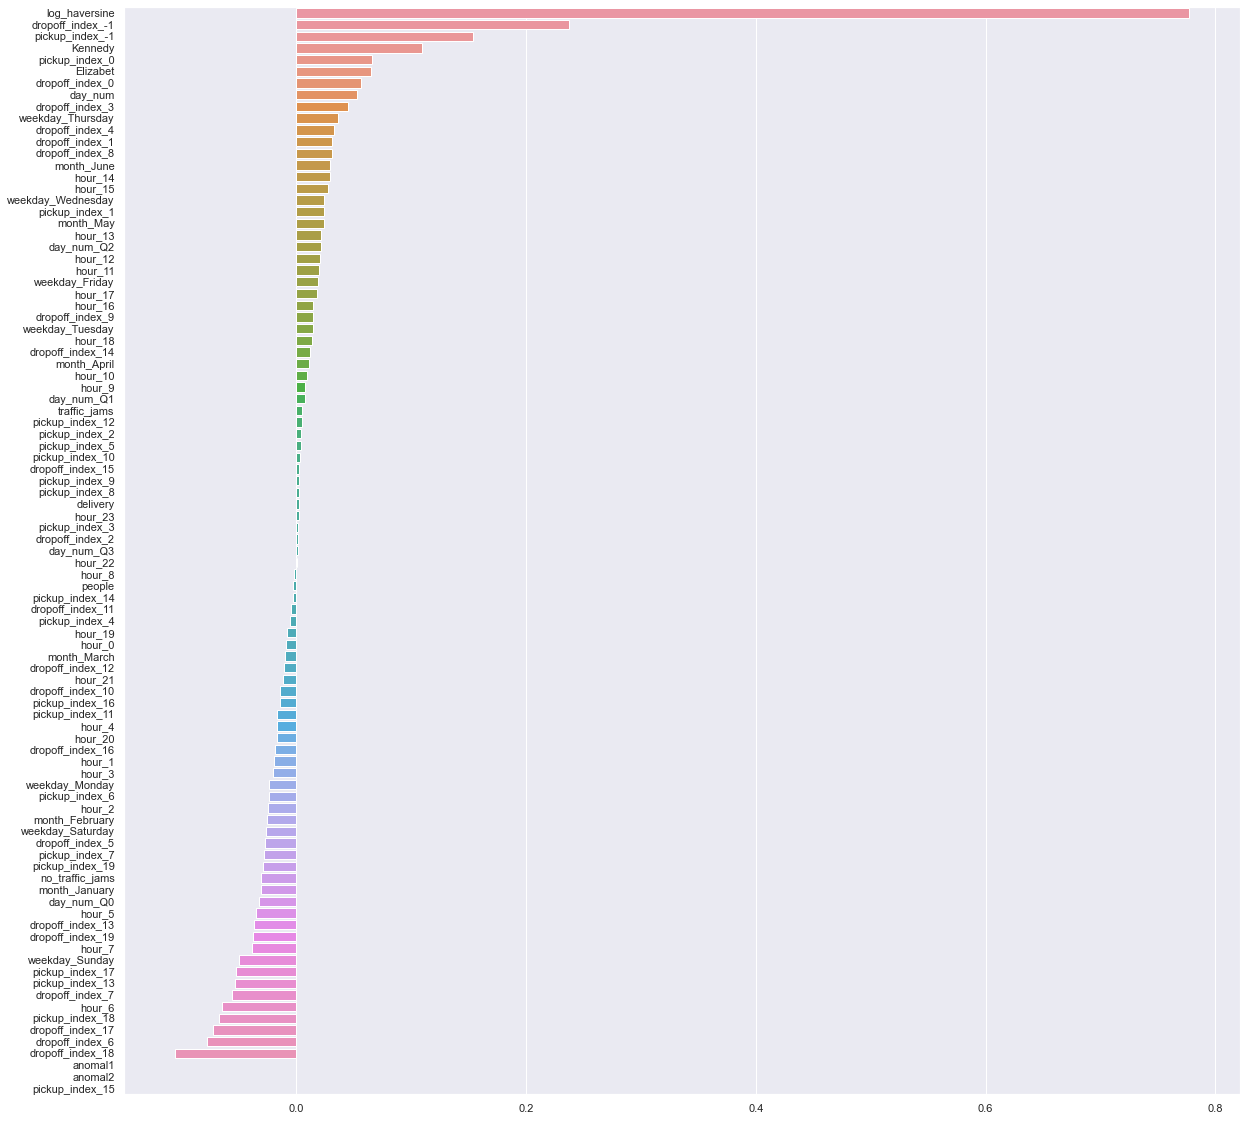

In [957]:
X_mean = df.mean()
numeric_features = X_train.columns

X_train = X_train.fillna(X_mean)
X_test = X_test.fillna(X_mean)

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(20, 20)

In [958]:
df = df.drop(columns = ['hour_22', 'hour_8', 'people', 'hour_23'])

In [1049]:
regression(Ridge, 1, df)

0.5590268620695992

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [961]:
print(
    f'Число признаков до бинарок: {x.shape[1]}\n', 
    f'Число признаков после бинарок: {df.shape[1]}', sep='')

Число признаков до бинарок: 27
Число признаков после бинарок: 90


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [964]:
from sklearn.linear_model import Lasso

print('\nRidge:')
print(regression(Ridge, df))

print('\nLasso:')
print(regression(Lasso, df))


Ridge:
0.5591946022452862

Lasso:
0.9988658966301869


In [992]:
df = df.drop(columns = ['day_num'])

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

#### Код Соколова с семинара

In [1045]:
from sklearn.model_selection import GridSearchCV

train, val, y_tr, val_y = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

def validate_alpha(model, train, y_tr, val, val_y):

    alphas = np.logspace(-2, 3, 20)
    searcher = GridSearchCV(model(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
    searcher.fit(train, y_tr)

    best_alpha = searcher.best_params_["alpha"]
    print("Best alpha = %.4f" % best_alpha)

    plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
    plt.xscale("log")
    plt.xlabel("alpha")
    plt.ylabel("CV score")
    
    return best_alpha

In [995]:
y_tr

183257     0.469263
927492     0.324642
450013    -0.819048
647489    -0.091409
1266139    1.539837
             ...   
511726    -1.018379
1022807    1.418474
1077722   -0.165475
1238399    0.039728
486420     0.459395
Name: log_trip_duration, Length: 780777, dtype: float64

Best alpha = 14.3845


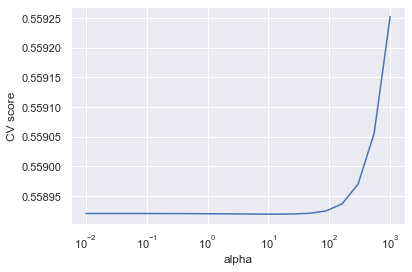

In [1051]:
alpha_r = validate_alpha(Ridge, train, y_tr, val, val_y)

Best alpha = 0.0100


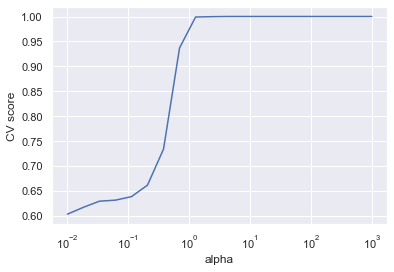

In [997]:
alpha_l = validate_alpha(Lasso, train, y_tr, val, val_y)

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [999]:
mdl = Lasso(alpha=0.1).fit(train, y_tr)
val_pred = mdl.predict(val)

In [1004]:
val_y.values.reshape(-1, 1)

array([[ 0.54433478],
       [ 1.52082931],
       [-1.77573462],
       ...,
       [-0.59530817],
       [ 0.32101779],
       [-1.22294423]])

In [1007]:
pred_val = mdl.predict(val).reshape(-1,1)
loss = mean_squared_error(val_y, pred_val, squared=False)

In [1008]:
loss

0.6363783393299174

In [1039]:
def alpha_zeros_Lasso(train, y_tr, val, val_y):

    
    alphas = np.logspace(-4, 0.5, 20)
    
    alpha_zeros = pd.DataFrame(columns = ['Alpha', 'Zeros'])
    alpha_zeros['Alpha'] = alphas
    
    for alph in alphas:
        
        mdl = Lasso(alpha=alph).fit(train, y_tr)
        pred_val = mdl.predict(val).reshape(-1,1)
        
        zeros = np.sum(mdl.coef_==0)
        
        alpha_zeros.loc[alpha_zeros['Alpha'] == alph,'Zeros'] = zeros
    
    return alpha_zeros

In [1040]:
az = alpha_zeros_Lasso(train, y_tr, val, val_y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.819e+03, tolerance: 7.809e+01
  model = cd_fast.enet_coordinate_descent(


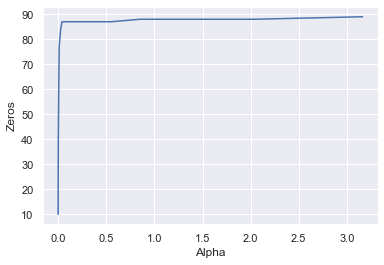

In [1041]:
sns.lineplot(data=az, x='Alpha', y='Zeros')
ax.set(title=f'', xlabel='Альфа', ylabel='Число нулевых коэффициентов')


#### ну тут резкий рост обнуления с ростом альфы, лассо плохо работает на данной примере

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

#### Так, ну первое: пыталась делать фича интеракшн выше, где делала переменную по квартилям частоты заказа поездок в день, вместо самого дня. Еще идея - контролировать на праздники. Включать не все категориальные дней, а только дни праздников. Осуществить не успела. Качество моей модели просело((( Не знаю почему, возможно из-за добавления других фичей, а не этой конкретно. В общем-то грустно! Может, накосячила с форматом данных на которых обучались модели после добавления индексов заказа. Может, надо было делить на меньшее количество квадратиков, чтобы было меньше дами и мультиколлинераности

#### Почему признак полезный - отметает непопулярные направления, которые редко заказывают. Нивелирует влияние квадратиков -1: их довольно много, дамми для них неинформативна. Линрег не может вытащить, тк включенные дамми значат следующее: при прочих равных, заказ из квадратика 1 увеличивает время поездки на ... секунд. А именно куда поездка будет совершена не учитывает. Ну вообще тут так-то надо смотреть на корреляцию с log_haversine, потому что она явно ненулевая и по сути признаки по набору информации похожи. Мб признак, который собрали сейчас дополняет информацию о среднем расстоянии, тк мы не учитывали дома, например. А разделение по квадратиком обучается на среднем времени поездке и может сказать, что даже для соседних квадратиков можно долго ехать, тк там надо много объезжать, неудобные дороги и тд

In [1055]:
grouped = x.groupby([x['dropoff_index'], x['pickup_index']]).count()[['log_trip_duration']].reset_index()

grouped = grouped.sort_values('log_trip_duration', ascending=False)[0:100]

In [1036]:
x['feature_inter'] = 0
x.loc[(x['dropoff_index'].isin(set(grouped['dropoff_index']))) &\
      (x['pickup_index'].isin(set(grouped['pickup_index']))),'feature_inter'] = 1

In [1042]:
df['feature_inter'] = x['feature_inter']

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [1052]:
regression(Ridge, alpha_r, df)

0.5590256560586389

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

In [1053]:
<img src="https://sun9-east.userapi.com/sun9-24/s/v1/ig2/1izwu-kPNinLzck3rZfkDUVV_wbPqyyQIxH2_WDOuXdRkhPyghLpBB2yyuPy3Hs8DXn3QrdA9tuhwi0OvMYocl3q.jpg?size=440x420&quality=95&type=album" style="width: 400px">

SyntaxError: invalid syntax (1557794452.py, line 1)